In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from math import sqrt
from tqdm import tqdm

In [63]:
d1=pd.read_csv("data1.csv",header=None)
d2=pd.read_csv("data2.csv",header=None)
d3=pd.read_csv("data3.csv",header=None)
d4=pd.read_csv("data4.csv",header=None)

In [42]:
def init_centroids(c,data):
    centroids=[]
    for i in range(c):
        centre=[]
        for d in range(len(data.columns)):
            centre.append(random.uniform(data[d].min(),data[d].max()))
        centroids.append(centre)
    return centroids

In [43]:
def dist(a,b):
    dim=len(a)
    s=0
    for i in range(dim):
        s+=(a[i]-b[i])**2
    return sqrt(s)

def calc_u(centroids,m,X):
    u=[]
    for i in range(len(centroids)):
        dist1=dist(X,centroids[i])
        ui=0
        dist2=[]
        for j in range(len(centroids)):
            dist2.append(dist(X,centroids[j]))
        if 0 in dist2:
            u=np.zeros((1,len(centroids)))[0]
            u[dist2.index(0)]=1
            break
        ui=1/np.sum(np.power(np.divide(dist1,dist2),(2/(m-1))))
        u.append(ui)
    return u

In [44]:
def calc_centroids(us,data,c,m):
    centroids=[]
    for i in range(c):
        centre=[]
        for d in range(len(data.columns)):
            centre.append(np.sum(data[d]*(us.iloc[:][i]**m))  /np.sum(us.iloc[:][i]**m))
#             y=np.sum(data[d]*(us.iloc[:][i]**m))  /np.sum(us.iloc[:][i]**m)
        centroids.append(centre)
    return np.array(centroids)

In [59]:
def plot_cmeans(centroids,us,data):
    plt.scatter(data[0],data[1],c=np.array(us))
    plt.scatter(centroids.T[0],centroids.T[1],c="orange",s=100,marker="o")
    plt.show()

    
def plot_cmeans_crisp(centroids,us,data):
    cm=np.argmax(np.array(us),axis=1)
    plt.scatter(data[0],data[1],c=cm)
    plt.scatter(centroids.T[0],centroids.T[1],c="orange",s=100,marker="o")
    plt.show()

def C_means(c,m,data):
    centroids=init_centroids(c,data)
    for i in range(100):
        us=data.apply(lambda a : calc_u(centroids,m,a), axis=1, result_type='expand')
        centroids=calc_centroids(us,data,c,m)
    return centroids,us

In [61]:
def cost(centroids,us,data,m):
    co=0
    for j in range(len(data)):
        s=0
        for i in range(len(centroids)):
            s+=(us.iloc[j][i]**m)*(dist(data.iloc[j],centroids[i])**2)
        co+=s
    return co

In [69]:
def cost_plot(data,m):
    costs=[]
    for i in tqdm(range(2,8)):
        centroids,us=C_means(i,m,data)
        costs.append(cost(centroids,us,data,m))
    plt.plot(range(2,8),costs,marker="+")

# بررسی کارایی الگوریتم و نمودار crisp

In [76]:
centroids,us=C_means(3,5,d1)

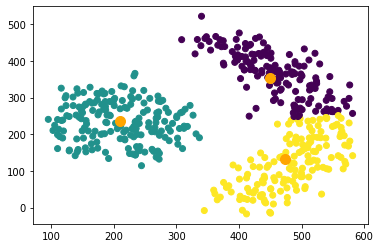

In [77]:
plot_cmeans_crisp(centroids,us,d1)

# بررسی تاثیر m و نمودار فازی

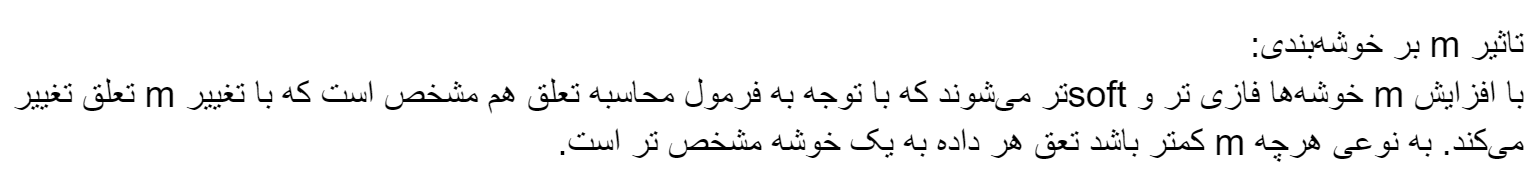

In [78]:
centroids,us=C_means(3,10,d1)

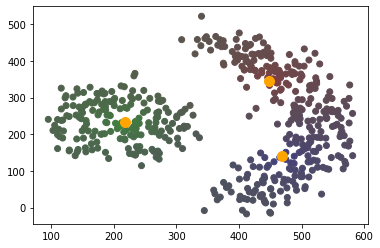

In [79]:
plot_cmeans(centroids,us,d1)

In [82]:
centroids,us=C_means(3,7.5,d1)

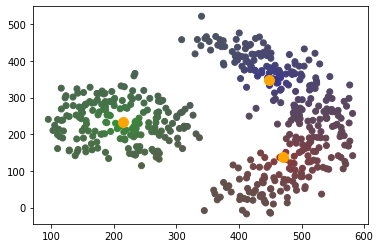

In [83]:
plot_cmeans(centroids,us,d1)

In [46]:
centroids,us=C_means(3,5,d1)

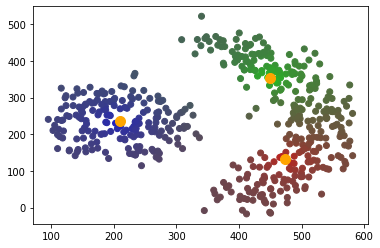

In [47]:
plot_cmeans(centroids,us,d1)

In [49]:
centroids,us=C_means(3,1.2,d1)

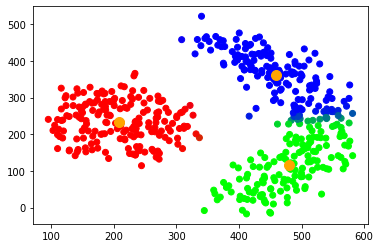

In [50]:
plot_cmeans(centroids,us,d1)

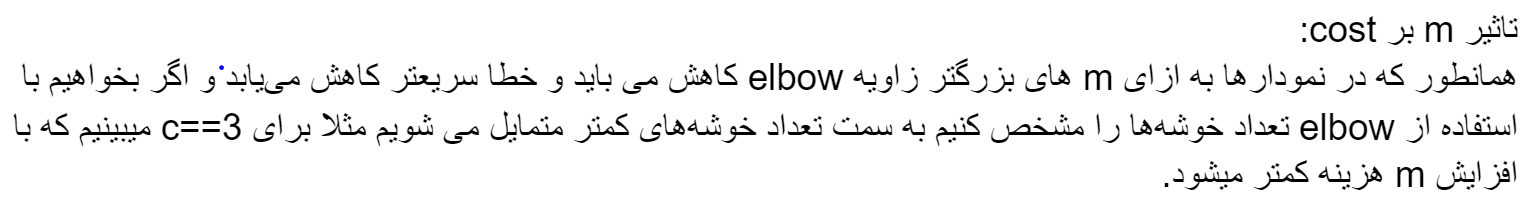

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:28<00:00, 54.81s/it]


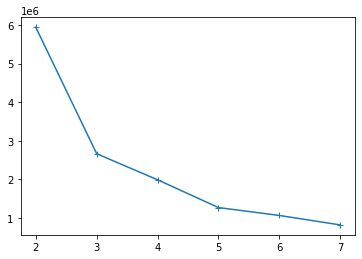

In [90]:
cost_plot(d1,2)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:02<00:00, 50.34s/it]


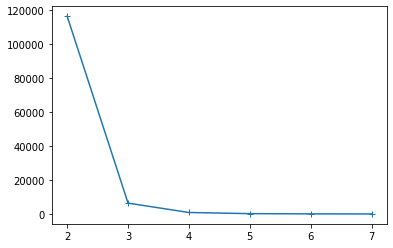

In [89]:
cost_plot(d1,8)

# محاسبه خطا

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:01<00:00, 60.18s/it]


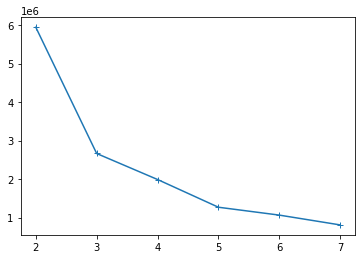

In [70]:
cost_plot(d1,2)

Elbow=3

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [26:28<00:00, 264.70s/it]


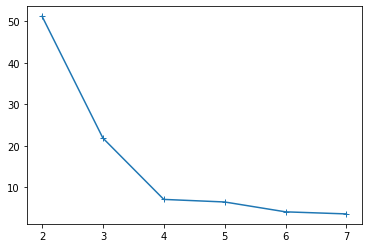

In [71]:
cost_plot(d2,2)

Elbow=4

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [09:25<00:00, 94.22s/it]


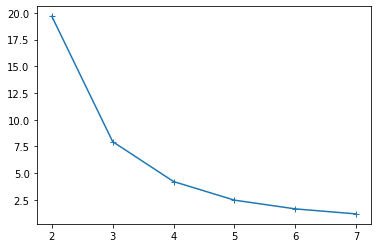

In [72]:
cost_plot(d3,3)

Elbow=3

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:56<00:00, 69.41s/it]


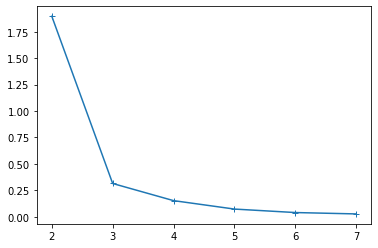

In [73]:
cost_plot(d4,4)

Elbow=3